In [ ]:
import pandas as pd
df=pd.read_excel('/Bookshop.xlsx')

In [ ]:
file_path = '/Bookshop.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
book_df = pd.read_excel(file_path, sheet_name='Book')
author_df = pd.read_excel(file_path, sheet_name='Author')
ratings_df = pd.read_excel(file_path, sheet_name='Ratings')
edition_df = pd.read_excel(file_path,sheet_name='Edition')
salesQ1_df = pd.read_excel(file_path,sheet_name='Sales Q1')
salesQ2_df = pd.read_excel(file_path,sheet_name='Sales Q2')
salesQ3_df = pd.read_excel(file_path,sheet_name='Sales Q3')
salesQ4_df = pd.read_excel(file_path,sheet_name='Sales Q4')

In [ ]:
print("Book Sheet:")
print(book_df.head())
print("\nAuthor Sheet:")
print(author_df.head())
print("\nRatings Sheet:")
print(ratings_df.head())
print("\nEdition Sheet:")
print(edition_df.head())
print("\nSales Q1 Sheet:")
print(salesQ1_df.head())
print("\nSales Q2 Sheet:")
print(salesQ2_df.head())
print("\nSales Q3 Sheet:")
print(salesQ3_df.head())
print("\nSales Q4 Sheet:")
print(salesQ4_df.head())

Book Sheet:
  BookID                 Title AuthID
0  BB194         Ballinby Boys  AM329
1  NC652    Nothing But Capers  AS443
2  AD222  Alanna Saves the Day  BH149
3  PA169            Post Alley  BM856
4  TC188    Thatchwork Cottage  BM856

Author Sheet:
  AuthID First Name      Last Name   Birthday Country of Residence  \
0  AS443    Abraham     Stackhouse 2147-07-01               Norway   
1  AW980     Amelia  Wangerin, Jr. 2141-03-26          New Zealand   
2  AI923  Anastasia           Inez 2148-03-30          New Zealand   
3  AM329     Arthur        McCrumb 2148-03-13          New Zealand   
4  AH957     Arturo       Hijuelos 2129-01-09       United Kingdom   

   Hrs Writing per Day  
0                  6.0  
1                 16.0  
2                 11.0  
3                  3.0  
4                  8.0  

Ratings Sheet:
  BookID  Rating  ReviewerID  ReviewID
0  AD222       5         105      3372
1  AD222       3         113      7340
2  AD222       3         234     20430
3 

In [ ]:
# Reading all sheets into a dictionary of DataFrames
excel_data = pd.read_excel(file_path, sheet_name=None)

# List of sheet names to ignore
ignore_sheets = ['Edition', 'Publisher', 'SalesQ1_df', 'SalesQ2_df', 'SalesQ3_df', 'SalesQ4_df', 'Award']

# Initializing a list to hold the DataFrames to be merged
sheets_to_merge = []

# Loop through each sheet in the Excel file
for sheet_name, sheet_data in excel_data.items():
    # Skiping the sheets we want to ignore
    if sheet_name.lower() in [sheet.lower() for sheet in ignore_sheets]:
        continue

    # Append the sheet data to the sheets_to_merge list
    sheets_to_merge.append(sheet_data)

# If there are no sheets to merge, exit early
if len(sheets_to_merge) == 0:
    print("No valid sheets to merge.")
else:
    # Start with the first DataFrame in the list
    final_data = sheets_to_merge[0]

    # Loop through the rest of the DataFrames and merge them
    for df in sheets_to_merge[1:]:
        # Ensure both DataFrames have the same set of columns before merging
        common_columns = list(final_data.columns.intersection(df.columns))

        if len(common_columns) == 0:
            print(f"No common columns to merge between DataFrames.")
            continue  # Skip this merge if no common columns exist

        # Perform the merge using the common columns
        final_data = pd.merge(final_data, df, how='outer', on=common_columns)

    # Save the final merged DataFrame to a CSV file
    final_data.to_csv('bookshop_combined_outer_join.csv', index=False)

    print("CSV file created: 'bookshop_combined_outer_join.csv'")


No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
CSV file created: 'bookshop_combined_outer_join.csv'


In [ ]:
df=pd.read_csv('bookshop_combined_outer_join.csv',low_memory=False)
df

,BookID,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,5.0,105.0,3372.0
1,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,3.0,113.0,7340.0
2,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,3.0,234.0,20430.0
3,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,4.0,459.0,40653.0
4,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,2.0,550.0,51337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599177,NaN,NaN,AW980,Amelia,"Wangerin, Jr.",2141-03-26,New Zealand,16.0,NaN,NaN,NaN,NaN,NaN
599178,NaN,NaN,BL857,Bravig,Lewisohn,2238-01-21,United States,11.0,NaN,NaN,NaN,NaN,NaN
599179,NaN,NaN,DF413,Darryl,Fleischman,2131-12-07,Germany,16.0,NaN,NaN,NaN,NaN,NaN
599180,NaN,NaN,HM751,Hamlin,Myrer,2225-01-29,Brazil,9.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599182 entries, 0 to 599181
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BookID                599175 non-null  object 
 1   Title                 592599 non-null  object 
 2   AuthID                592606 non-null  object 
 3   First Name            592606 non-null  object 
 4   Last Name             592606 non-null  object 
 5   Birthday              592606 non-null  object 
 6   Country of Residence  592606 non-null  object 
 7   Hrs Writing per Day   592606 non-null  float64
 8   CheckoutMonth         599173 non-null  float64
 9   Number of Checkouts   599173 non-null  float64
 10  Rating                599173 non-null  float64
 11  ReviewerID            599173 non-null  float64
 12  ReviewID              599173 non-null  float64
dtypes: float64(6), object(7)
memory usage: 59.4+ MB


checking for missing values

In [ ]:
df.isnull().sum()

,0
BookID,7
Title,6583
AuthID,6576
First Name,6576
Last Name,6576
Birthday,6576
Country of Residence,6576
Hrs Writing per Day,6576
CheckoutMonth,9
Number of Checkouts,9


In [ ]:
import pandas as pd
# Replace missing values in numeric columns with median or mean as appropriate
numeric_columns = ['CheckoutMonth', 'Number of Checkouts', 'Rating', 'ReviewerID', 'ReviewID', 'Hrs Writing per Day']

# Use median for numeric columns (you can change to mean if preferred)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Replace missing values in categorical columns with mode (most frequent value)
categorical_columns = ['Title', 'AuthID', 'First Name', 'Last Name', 'Birthday', 'Country of Residence', 'BookID']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with the most frequent value

# Check the result
print(df.isnull().sum())  # This will show if there are any remaining missing values


BookID                  0
Title                   0
AuthID                  0
First Name              0
Last Name               0
Birthday                0
Country of Residence    0
Hrs Writing per Day     0
CheckoutMonth           0
Number of Checkouts     0
Rating                  0
ReviewerID              0
ReviewID                0
dtype: int64


In [ ]:
df.describe()

,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
count,599182.000000,599182.000000,599182.000000,599182.000000,599182.000000,5.991820e+05
mean,6.638945,6.497406,28.303207,4.119303,26846.496225,2.678723e+06
std,2.277793,3.447469,29.221805,0.931067,15314.806833,1.531473e+06
min,0.000000,1.000000,2.000000,1.000000,3.000000,-8.289000e+03
25%,5.000000,4.000000,9.000000,4.000000,13705.000000,1.364738e+06
50%,7.000000,7.000000,17.000000,4.000000,26777.000000,2.671756e+06
75%,8.000000,9.000000,36.000000,5.000000,39971.000000,3.991298e+06
max,16.000000,12.000000,130.000000,5.000000,53424.000000,5.338737e+06


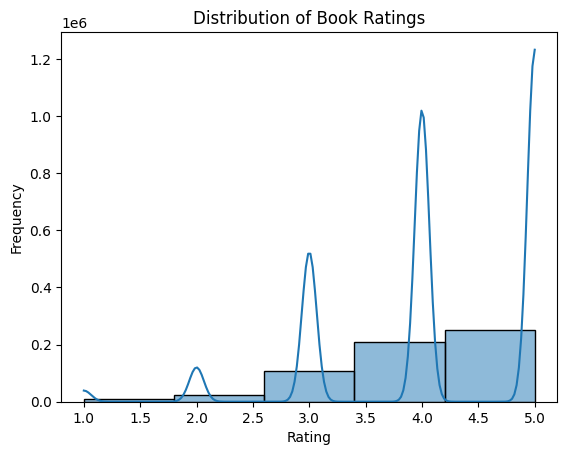

In [ ]:
#plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

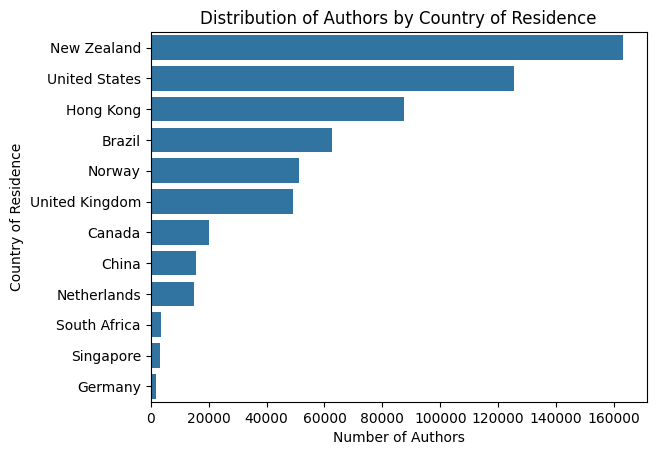

In [ ]:
sns.countplot(y=df['Country of Residence'],
              order=df['Country of Residence'].value_counts().index)
plt.title('Distribution of Authors by Country of Residence')
plt.xlabel('Number of Authors')
plt.ylabel('Country of Residence')
plt.show()

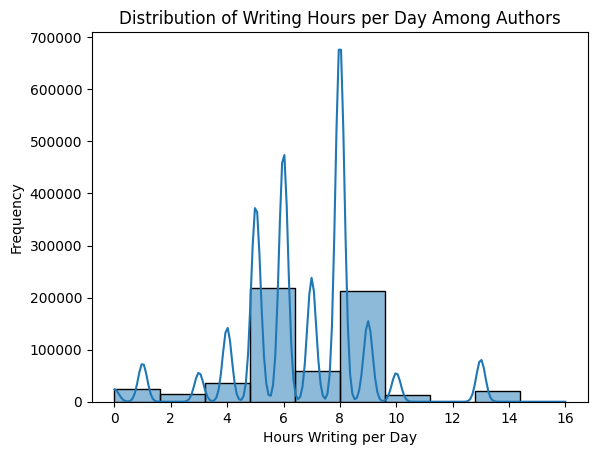

In [ ]:
sns.histplot(df['Hrs Writing per Day'], bins=10, kde=True)
plt.title('Distribution of Writing Hours per Day Among Authors')
plt.xlabel('Hours Writing per Day')
plt.ylabel('Frequency')
plt.show()

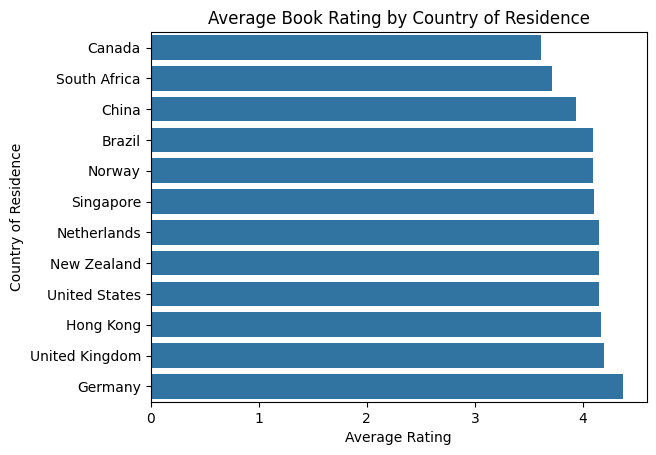

In [ ]:
avg_rating_by_country = df.groupby('Country of Residence')['Rating'].mean().sort_values()
sns.barplot(x=avg_rating_by_country, y=avg_rating_by_country.index)
plt.title('Average Book Rating by Country of Residence')
plt.xlabel('Average Rating')
plt.ylabel('Country of Residence')
plt.show()

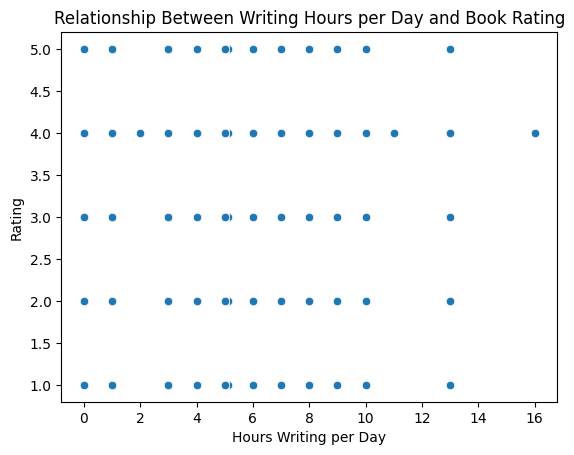

In [ ]:
sns.scatterplot(x='Hrs Writing per Day', y='Rating', data=df)
plt.title('Relationship Between Writing Hours per Day and Book Rating')
plt.xlabel('Hours Writing per Day')
plt.ylabel('Rating')
plt.show()

Calculate total sales for each book

In [ ]:
df

,BookID,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,5.0,105.0,3372.0
1,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,3.0,113.0,7340.0
2,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,3.0,234.0,20430.0
3,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,4.0,459.0,40653.0
4,AD222,Alanna Saves the Day,BH149,Bernard,Hopf,2122-11-27,United States,1.0,1.0,40.0,2.0,550.0,51337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599177,TM925,The Mallemaroking,AW980,Amelia,"Wangerin, Jr.",2141-03-26,New Zealand,16.0,7.0,17.0,4.0,26777.0,2671756.0
599178,TM925,The Mallemaroking,BL857,Bravig,Lewisohn,2238-01-21,United States,11.0,7.0,17.0,4.0,26777.0,2671756.0
599179,TM925,The Mallemaroking,DF413,Darryl,Fleischman,2131-12-07,Germany,16.0,7.0,17.0,4.0,26777.0,2671756.0
599180,TM925,The Mallemaroking,HM751,Hamlin,Myrer,2225-01-29,Brazil,9.0,7.0,17.0,4.0,26777.0,2671756.0


In [ ]:
df.shape

(599182, 13)

In [ ]:
sales_df=pd.concat([salesQ1_df,salesQ2_df,salesQ3_df,salesQ4_df])

In [ ]:
sales_df

,Sale Date,ISBN,Discount,ItemID,OrderID
0,2193-01-02,989-28-3705-007-2,NaN,107020-91-8011,107020-1
1,2193-01-02,989-28-79-11297-4,NaN,107020-9-3293,107020-10
2,2193-01-02,989-28-79-11297-4,NaN,107020-91-4622,107020-11
3,2193-01-02,989-28-79-18127-7,NaN,107020-38-4663,107020-12
4,2193-01-02,989-28-79-82197-5,0.15,107020-1-1485,107020-13
...,...,...,...,...,...
13088,2193-12-31,989-28-229-5891-8,NaN,107383-57-1559,107383-49786
13089,2193-12-31,989-28-3705-222-9,NaN,107383-73-7579,107383-49786
13090,2193-12-31,989-28-3705-007-2,NaN,107383-54-3838,107383-49787
13091,2193-12-31,989-28-229-9769-6,NaN,107383-75-7720,107383-49787


In [ ]:
edition_df

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99
1,989-28-654-6930-3,NP937,Hardcover,PP,2178-08-18,394,6,30.99
2,989-28-79-52883-6,PA169,Hardcover,PP,2178-09-08,384,10,27.99
3,989-28-79-43574-5,TM925,Graphic,ESP,2178-09-15,187,8,23.99
4,989-28-654-5794-2,HS107,Hardcover,PP,2178-09-29,640,3,26.99
...,...,...,...,...,...,...,...,...
90,989-28-654-6507-7,SS693,Trade paperback,PP,2192-05-15,387,8,15.99
91,989-28-79-03683-6,TA182,Hardcover,ESP,2192-07-03,340,35,18.50
92,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99
93,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,13.46


In [ ]:
book_data=pd.merge(edition_df ,df ,on='BookID')

In [ ]:
book_data

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,19.0,-3554.0
1,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,5.0,52.0,-1365.0
2,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,174.0,13638.0
3,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,5.0,178.0,9385.0
4,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,263.0,21251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012412,989-28-3705-205-2,MM424,Trade paperback,CHP,2192-09-18,324,8,11.99,(im)Mortality,CW626,Clifford,Wolitzer,2143-08-01,United Kingdom,8.0,1.0,2.0,5.0,52750.0,5269060.0
1012413,989-28-3705-205-2,MM424,Trade paperback,CHP,2192-09-18,324,8,11.99,(im)Mortality,CW626,Clifford,Wolitzer,2143-08-01,United Kingdom,8.0,1.0,2.0,5.0,52756.0,5270650.0
1012414,989-28-3705-205-2,MM424,Trade paperback,CHP,2192-09-18,324,8,11.99,(im)Mortality,CW626,Clifford,Wolitzer,2143-08-01,United Kingdom,8.0,1.0,2.0,4.0,52851.0,5279655.0
1012415,989-28-3705-205-2,MM424,Trade paperback,CHP,2192-09-18,324,8,11.99,(im)Mortality,CW626,Clifford,Wolitzer,2143-08-01,United Kingdom,8.0,1.0,2.0,5.0,53268.0,5318583.0


In [ ]:
#edition_sales_df['Total Sales'] = edition_sales_df['Price'] * (1 - edition_sales_df['Discount'])
#edition_sales_df['Total Sales'].fillna(edition_sales_df['Price'], inplace=True)

In [ ]:
#book_sales = edition_sales_df.groupby('BookID')['Total Sales'].sum().reset_index()
#book_sales

Popularity Based Recommendation System

In [ ]:
avg_ratings_df=book_data.groupby('Title').mean(numeric_only=True)['Rating'].reset_index()
avg_ratings_df.rename(columns={'Rating':'AVG_rating'},inplace=True)
avg_ratings_df

,Title,AVG_rating
0,(im)Mortality,4.077551
1,9803 North Millworks Road,4.089084
2,A Horrible Human with the Habits of a Monster,3.714754
3,Adventures of Kaya,4.421885
4,Alanna Saves the Day,4.018008
5,And I Said Yes,3.860825
6,Ballinby Boys,3.740396
7,Banana Slug and Xyr Friends,4.094183
8,Banana Slug and the Glass Half Full,4.338724
9,Banana Slug and the Lost Cow,4.005911


In [ ]:
num_ratings_df = book_data.groupby('Title').count()['Rating'].reset_index()
num_ratings_df.rename(columns={'Rating':'num_rating'},inplace=True)

In [ ]:
popular_df=num_ratings_df.merge(avg_ratings_df,on='Title')
popular_df

,Title,num_rating,AVG_rating
0,(im)Mortality,5880,4.077551
1,9803 North Millworks Road,19128,4.089084
2,A Horrible Human with the Habits of a Monster,3660,3.714754
3,Adventures of Kaya,18204,4.421885
4,Alanna Saves the Day,11328,4.018008
5,And I Said Yes,23280,3.860825
6,Ballinby Boys,10308,3.740396
7,Banana Slug and Xyr Friends,25992,4.094183
8,Banana Slug and the Glass Half Full,26712,4.338724
9,Banana Slug and the Lost Cow,24360,4.005911


In [ ]:
popular_df[popular_df['num_rating']>=1000]

,Title,num_rating,AVG_rating
0,(im)Mortality,5880,4.077551
1,9803 North Millworks Road,19128,4.089084
2,A Horrible Human with the Habits of a Monster,3660,3.714754
3,Adventures of Kaya,18204,4.421885
4,Alanna Saves the Day,11328,4.018008
5,And I Said Yes,23280,3.860825
6,Ballinby Boys,10308,3.740396
7,Banana Slug and Xyr Friends,25992,4.094183
8,Banana Slug and the Glass Half Full,26712,4.338724
9,Banana Slug and the Lost Cow,24360,4.005911


In [ ]:
book_data_df=popular_df.merge(book_data,on='Title')

In [ ]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0
1,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,5.0,500.0,42080.0
2,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,5.0,557.0,51839.0
3,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,859.0,79960.0
4,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,3.0,1245.0,120441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012412,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,2.0,53277.0,5320077.0
1012413,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,5.0,53316.0,5324472.0
1012414,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,1.0,53340.0,5327961.0
1012415,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,5.0,53396.0,5330789.0


In [34]:
book_data_df.shape

(57, 22)

In [33]:
book_data_df=book_data_df.drop_duplicates('Title')

In [35]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0
5880,9803 North Millworks Road,19128,4.089084,989-28-79-82749-6,NR695,Hardcover,ESP,2181-07-10,384,5,...,Carolyn,Segal,2133-09-24,United States,7.00,3.0,49.0,4.0,8.0,-7179.0
25008,A Horrible Human with the Habits of a Monster,3660,3.714754,989-28-79-16826-1,AM124,Graphic,ESP,2189-03-24,85,3,...,Kenneth,Douglas,2163-09-24,South Africa,3.00,7.0,9.0,4.0,148.0,8167.0
28668,Adventures of Kaya,18204,4.421885,989-28-3705-222-9,AK974,Trade paperback,CHP,2182-07-23,256,35,...,Ward,Haigh,2153-10-07,Brazil,7.00,8.0,64.0,5.0,315.0,25164.0
46872,Alanna Saves the Day,11328,4.018008,989-28-3705-987-7,AD222,Trade paperback,CHP,2185-09-22,188,10,...,Bernard,Hopf,2122-11-27,United States,1.00,1.0,40.0,5.0,105.0,3372.0
58200,And I Said Yes,23280,3.860825,989-28-79-18127-7,AY135,Hardcover,ESP,2179-04-24,704,15,...,Elmer,Komroff,2129-07-11,Norway,6.00,8.0,10.0,4.0,79.0,79.0
81480,Ballinby Boys,10308,3.740396,989-28-79-68089-3,BB194,Hardcover,ESP,2179-05-18,401,10,...,Arthur,McCrumb,2148-03-13,New Zealand,3.00,3.0,33.0,5.0,225.0,14679.0
91788,Banana Slug and Xyr Friends,25992,4.094183,989-28-3705-138-3,BF374,Board book,CHP,2188-05-27,12,18,...,Hillary,Barnhardt,2154-03-07,New Zealand,4.00,9.0,28.0,4.0,28.0,-4068.0
117780,Banana Slug and the Glass Half Full,26712,4.338724,989-28-3705-592-3,BF889,Board book,CHP,2186-10-10,12,8,...,Gloria,Green,2156-09-19,Hong Kong,8.00,7.0,16.0,5.0,105.0,5946.0
144492,Banana Slug and the Lost Cow,24360,4.005911,989-28-3705-583-1,BC244,Board book,CHP,2187-05-08,13,10,...,Hillary,Barnhardt,2154-03-07,New Zealand,4.00,1.0,21.0,4.0,12.0,-3951.0


In [ ]:
book_data_df.shape

(1012417, 22)

In [ ]:
book_data_df.groupby('AuthID').count()['Rating']

,Rating
AuthID,
AH957,4
AI923,4
AM329,10308
AS443,6492
AW980,4
BH149,11328
BL857,4
BM856,59280
BT132,157824


In [ ]:
book_data_df.isnull().sum()

,0
Title,0
num_rating,0
AVG_rating,0
ISBN,0
BookID,0
Format,0
PubID,0
Publication Date,0
Pages,0
Print Run Size (k),0


In [36]:
book_data_df['TransactionID'] = book_data_df['ReviewerID'].astype(str) + '_' + book_data_df['CheckoutMonth'].astype(str)

In [37]:
transactions = book_data_df.groupby('TransactionID')['Title'].apply(list)

In [38]:
transactions

,Title
TransactionID,
105.0_1.0,"[Alanna Saves the Day, The Spark and The Ashes]"
105.0_7.0,[Banana Slug and the Glass Half Full]
11.0_9.0,[It's Never Just a Glass]
113.0_8.0,[(im)Mortality]
115.0_7.0,[No More Lightning]
12.0_1.0,[Banana Slug and the Lost Cow]
121.0_10.0,[We're Sisters and We Kinda Like Each Other]
124.0_7.0,[Thatchwork Cottage]
1342.0_3.0,[Can I Be Honest?]


## KMeans Clustering

In [62]:
features = ['num_rating', 'AVG_rating', 'Pages', 'Print Run Size (k)', 'Hrs Writing per Day', 'Number of Checkouts', 'Rating']  # Changed to a list
X = book_data_df[features].fillna(0) # Changed df to book_data_df, as features likely belong to book_data_df

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
book_data_df['Cluster'] = kmeans.fit_predict(X)

In [65]:
kmeans.labels_

array([2, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 2, 4, 2, 4, 2, 4, 3, 0, 4,
       4, 0, 4, 2, 0, 4, 2, 4, 2, 3, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 1,
       4, 0, 4, 2, 4, 3, 4, 0, 2, 4, 2, 0, 0], dtype=int32)

In [66]:
book_data_df['Cluster']

,Cluster
0,2
5880,0
25008,2
28668,0
46872,4
58200,0
81480,4
91788,0
117780,0
144492,0


In [67]:
book_data_df['Cluster_new'] = book_data_df['Cluster']

In [68]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID,TransactionID,Cluster,Cluster_new
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0,113.0_8.0,2,2
5880,9803 North Millworks Road,19128,4.089084,989-28-79-82749-6,NR695,Hardcover,ESP,2181-07-10,384,5,...,United States,7.00,3.0,49.0,4.0,8.0,-7179.0,8.0_3.0,0,0
25008,A Horrible Human with the Habits of a Monster,3660,3.714754,989-28-79-16826-1,AM124,Graphic,ESP,2189-03-24,85,3,...,South Africa,3.00,7.0,9.0,4.0,148.0,8167.0,148.0_7.0,2,2
28668,Adventures of Kaya,18204,4.421885,989-28-3705-222-9,AK974,Trade paperback,CHP,2182-07-23,256,35,...,Brazil,7.00,8.0,64.0,5.0,315.0,25164.0,315.0_8.0,0,0
46872,Alanna Saves the Day,11328,4.018008,989-28-3705-987-7,AD222,Trade paperback,CHP,2185-09-22,188,10,...,United States,1.00,1.0,40.0,5.0,105.0,3372.0,105.0_1.0,4,4
58200,And I Said Yes,23280,3.860825,989-28-79-18127-7,AY135,Hardcover,ESP,2179-04-24,704,15,...,Norway,6.00,8.0,10.0,4.0,79.0,79.0,79.0_8.0,0,0
81480,Ballinby Boys,10308,3.740396,989-28-79-68089-3,BB194,Hardcover,ESP,2179-05-18,401,10,...,New Zealand,3.00,3.0,33.0,5.0,225.0,14679.0,225.0_3.0,4,4
91788,Banana Slug and Xyr Friends,25992,4.094183,989-28-3705-138-3,BF374,Board book,CHP,2188-05-27,12,18,...,New Zealand,4.00,9.0,28.0,4.0,28.0,-4068.0,28.0_9.0,0,0
117780,Banana Slug and the Glass Half Full,26712,4.338724,989-28-3705-592-3,BF889,Board book,CHP,2186-10-10,12,8,...,Hong Kong,8.00,7.0,16.0,5.0,105.0,5946.0,105.0_7.0,0,0
144492,Banana Slug and the Lost Cow,24360,4.005911,989-28-3705-583-1,BC244,Board book,CHP,2187-05-08,13,10,...,New Zealand,4.00,1.0,21.0,4.0,12.0,-3951.0,12.0_1.0,0,0


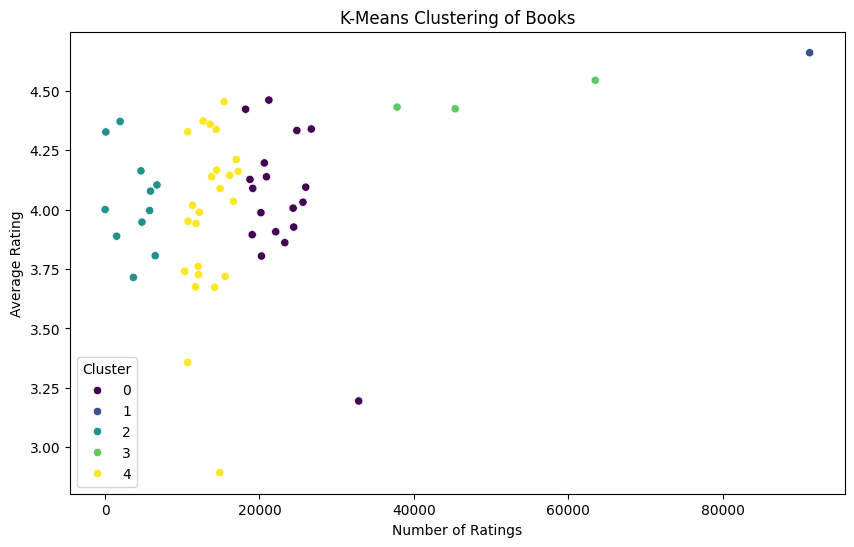

In [69]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_rating', y='AVG_rating', hue='Cluster', data=book_data_df, palette='viridis')
plt.title('K-Means Clustering of Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.legend(title='Cluster')
plt.show()

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
score = silhouette_score(X,book_data_df['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5730598501766111


In [92]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X, book_data_df['Cluster'])
print(f"Calinski-Harabasz Index: {score}")

Calinski-Harabasz Index: 195.1776615921258


In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
print(f"Inertia: {kmeans.inertia_}")

Inertia: 2187230150.0552454


book_data_df

## Association Rules Model

In [49]:
pip install mlxtend

In [50]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [52]:
# Convert transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

In [53]:
basket = book_data_df.groupby(['ReviewerID', 'BookID'])['Rating'].sum().unstack().reset_index().fillna(0).set_index('ReviewerID')

In [54]:
def encode_units(x):
    return 1 if x >= 1 else 0

In [55]:
basket = basket.applymap(encode_units)

In [56]:
basket

BookID,AD222,AK974,AM124,AY135,BB194,BC244,BF374,BF889,BR858,BS284,...,TM925,TO369,TP887,TS869,TT359,TT773,WG715,WK456,WO506,ZT703
ReviewerID,,,,,,,,,,,,,,,,,,,,,
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
book_pivote = book_data_df.groupby(['Title', 'BookID'])['Rating'].sum().unstack().reset_index().fillna(0).set_index('Title')

In [58]:
book_pivote

BookID,AD222,AK974,AM124,AY135,BB194,BC244,BF374,BF889,BR858,BS284,...,TM925,TO369,TP887,TS869,TT359,TT773,WG715,WK456,WO506,ZT703
Title,,,,,,,,,,,,,,,,,,,,,
(im)Mortality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9803 North Millworks Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Horrible Human with the Habits of a Monster,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventures of Kaya,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alanna Saves the Day,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And I Said Yes,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballinby Boys,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banana Slug and Xyr Friends,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banana Slug and the Glass Half Full,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [60]:
from mlxtend.frequent_patterns import association_rules


if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering min_support further or check your data.")
else:
    # Continue with association rule generation
    # The 'support_only=False' argument ensures that association_rules considers itemset lengths other than 1.
    # Assuming you want to generate rules for all frequent itemsets:
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.02, support_only=False, num_itemsets=frequent_itemsets.shape[0])


In [61]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(BF889),(AD222),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
1,(AD222),(BF889),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
2,(TA182),(AD222),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
3,(AD222),(TA182),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
4,(BS284),(BF374),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
5,(BF374),(BS284),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
6,(TA182),(BF889),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
7,(BF889),(TA182),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
8,(IA439),(HP265),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
9,(HP265),(IA439),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## K Nearest Neighbors

In [75]:
from scipy.sparse import csr_matrix

In [76]:
book_sparse = csr_matrix(book_pivote)

In [77]:
book_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 57 stored elements and shape (57, 57)>

In [78]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [79]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [80]:
book_pivote.index

Index(['(im)Mortality', '9803 North Millworks Road',
       'A Horrible Human with the Habits of a Monster', 'Adventures of Kaya',
       'Alanna Saves the Day', 'And I Said Yes', 'Ballinby Boys',
       'Banana Slug and Xyr Friends', 'Banana Slug and the Glass Half Full',
       'Banana Slug and the Lost Cow', 'Banana Slug and the Mossy Rock',
       'Burnished Silver', 'Can I Be Honest?', 'Cimornul',
       'Concerning Prophecy', 'Did You Hear?', 'Don't Check your Ego',
       'Dust on the Rim', 'Hashtag QuokkaSelfie', 'Heliotrope Pajamas',
       'Inconvenient Confessions: a memoir', 'Interrobangs for All',
       'It's Never Just a Glass', 'Kalakalal Avenue', 'Lace and Brandy',
       'Land Water Sky Space', 'Muddy Waters', 'Natural Pamplemousse',
       'No More Lightning', 'Not to Gossip, But', 'Nothing But Capers',
       'Portmeirion', 'Post Alley', 'Quiddity and Quoddity', 'Rystwyth',
       'Saint Esme', 'Say it with Snap!', 'She Also Tottered',
       'Soft, Pliable Truth', 

In [81]:
book_pivote.index[3]

'Adventures of Kaya'

In [82]:
book_name = book_pivote.index

# Deployement

In [83]:
import pickle
import os

In [84]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [85]:
os.makedirs('artifacts', exist_ok=True)

In [86]:
pickle.dump(model,open('artifacts/model.pkl', 'wb'))
pickle.dump(book_name,open('artifacts/book_name.pkl', 'wb'))
pickle.dump(book_data_df,open('artifacts/book_data_df.pkl', 'wb'))
pickle.dump(book_pivote,open('artifacts/book_pivote.pkl', 'wb'))

In [87]:
def recommend_book(book_name):
    # Find the index of the book
    book_id = np.where(book_pivote.index == book_name)[0]

    if len(book_id) == 0:
        print("Book not found in the pivot table.")
        return

    # Get the book vector
    book_vector = book_pivote.iloc[book_id[0], :].values.reshape(1, -1)

    # Find the nearest neighbors
    distance, suggestion = model.kneighbors(book_vector, n_neighbors=5)

    # Display suggestions
    for i in range(len(suggestion[0])):
        suggested_book = book_pivote.index[suggestion[0][i]]
        print(f"Suggested Book: {suggested_book}")


In [88]:
import numpy as np
book_name = 'And I Said Yes'
recommend_book(book_name)

Suggested Book: And I Said Yes
Suggested Book: Concerning Prophecy
Suggested Book: It's Never Just a Glass
Suggested Book: Hashtag QuokkaSelfie
Suggested Book: Did You Hear?


In [89]:
book_name='Ballinby Boys'
recommend_book(book_name)

Suggested Book: Ballinby Boys
Suggested Book: It's Never Just a Glass
Suggested Book: Concerning Prophecy
Suggested Book: Hashtag QuokkaSelfie
Suggested Book: Did You Hear?
